# Load the dataset

In [1]:
import requests
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Load the dataset
dataset = requests.get(url).text

# load it into a pandas dataframe
dataset = pd.read_csv(url, header=None)

# Set the columns names
dataset.columns = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "class"]

# Show the dataset
print(dataset)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  class
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]


# Do some exploratory analysis 

In [2]:
import matplotlib as plt
dataset.corr().style.background_gradient(cmap="coolwarm").set_precision(2)

C:\Users\orhe\AppData\Local\Temp\ipykernel_18404\1588578144.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  dataset.corr().style.background_gradient(cmap="coolwarm").set_precision(2)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
pregnant,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
bp,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
skin,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
bmi,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
pedigree,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
class,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


array([[<AxesSubplot: title={'center': 'pregnant'}>,
        <AxesSubplot: title={'center': 'glucose'}>,
        <AxesSubplot: title={'center': 'bp'}>],
       [<AxesSubplot: title={'center': 'skin'}>,
        <AxesSubplot: title={'center': 'insulin'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'pedigree'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'class'}>]], dtype=object)

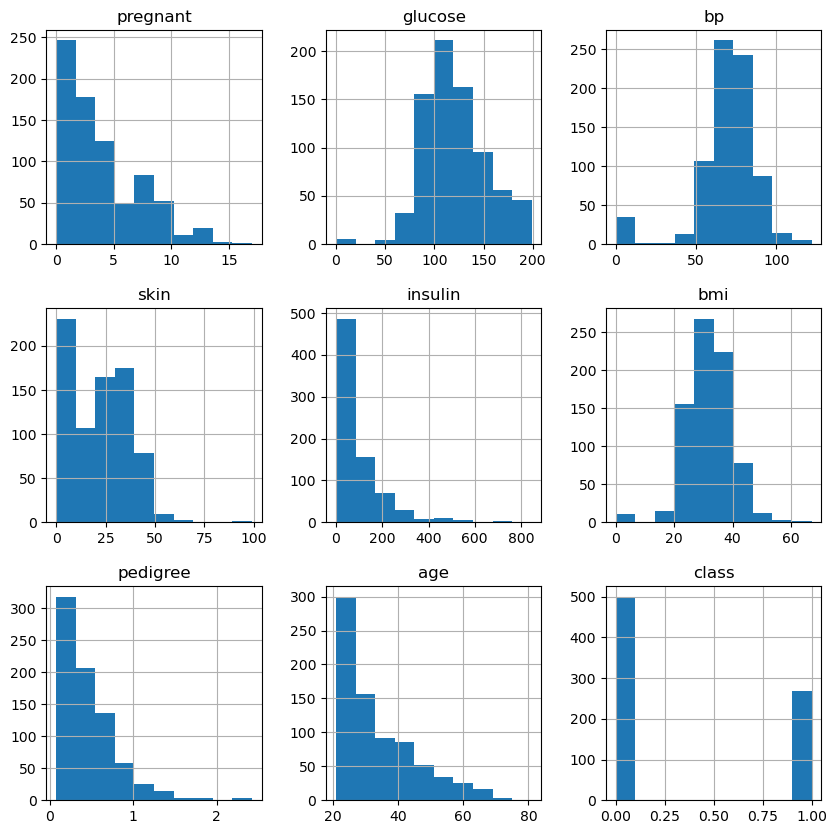

In [3]:
# Show distribution of the features
dataset.hist(figsize=(10, 10))

<AxesSubplot: >

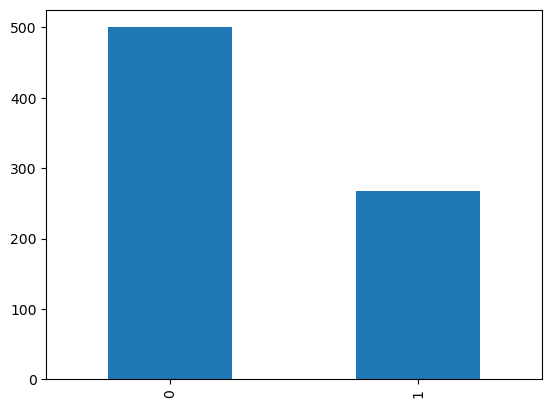

In [4]:
# Show the target distribution
dataset["class"].value_counts().plot(kind="bar")

# Balance dataset by undersampling the majority class

<AxesSubplot: >

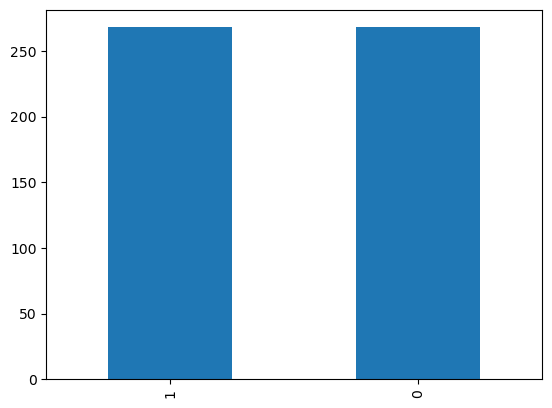

In [5]:
# Sort by class
dataset.sort_values("class", inplace=True)

# Get the number of samples in the majority class
majority_class_count = dataset["class"].value_counts()[0]
# Get the indices of the majority class
majority_class_indices = dataset[dataset["class"] == 0].index

# Get the number of samples in the minority class
minority_class_count = dataset["class"].value_counts()[1]

# Drop the first x samples of the majority class where x is the difference between the number of samples in the majority class and the number of samples in the minority class
dataset.drop(majority_class_indices[:majority_class_count - minority_class_count], inplace=True)

# Now shuffle the dataset
dataset = dataset.sample(frac=1)

# Show the target distribution
dataset["class"].value_counts().plot(kind="bar")

# Split the Dataset into Features and Target

In [6]:
features = dataset.iloc[:, 0:8]
target = dataset.iloc[:, 8]

# MinMax Scale the Dataframe

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

# Save the MinMax Scaler

In [8]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Split the Dataset into training and test data

In [9]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Split the Training data into training and validation data

In [10]:
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.2, random_state=1)

# Build a neural net

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add the input layer
model.add(Dense(12, input_dim=8, activation="relu"))

# Add the hidden layer
model.add(Dense(8, activation="relu"))

# Add the output layer
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Train the neural net

In [12]:
from keras.callbacks import ModelCheckpoint

# Train the model
history = model.fit(features_train, target_train, epochs=150, batch_size=10, validation_data=(features_val, target_val), callbacks=[ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)])

# Evaluate the model
scores = model.evaluate(features_test, target_test)
print(f"{model.metrics_names[1]}: {scores[1] * 100}")

Epoch 1/150
35/35 [==============================] - 1s 11ms/step - loss: 0.6792 - accuracy: 0.6316 - val_loss: 0.6810 - val_accuracy: 0.6047
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.6462 - val_loss: 0.6830 - val_accuracy: 0.5581
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6608 - val_loss: 0.6750 - val_accuracy: 0.5814
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6784 - val_loss: 0.6699 - val_accuracy: 0.6163
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.7076 - val_loss: 0.6688 - val_accuracy: 0.6163
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.7105 - val_loss: 0.6581 - val_accuracy: 0.6395
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7018 - val_loss: 0.6636 - val_accuracy: 0.6279
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7836 - val_loss: 0.5813 - val_accuracy: 0.7326
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7749 - val_loss: 0.5767 - val_accuracy: 0.7326
Epoch 61/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4624 - accuracy: 0.7895 - val_loss: 0.5754 - val_accuracy: 0.7093
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.7719 - val_loss: 0.5750 - val_accuracy: 0.6860
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7895 - val_loss: 0.5809 - val_accuracy: 0.7093
Epoch 64/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 0.7778 - val_loss: 0.5761 - val_accuracy: 0.7093
Epoch 65/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.7953 - val_loss: 0.5728 - val_accuracy: 0.7093
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.7953 - val_loss: 0.5643 - val_accuracy: 0.7093
Epoch 117/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7865 - val_loss: 0.5650 - val_accuracy: 0.6860
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7778 - val_loss: 0.5620 - val_accuracy: 0.6977
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7865 - val_loss: 0.5635 - val_accuracy: 0.7093
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7778 - val_loss: 0.5654 - val_accuracy: 0.7209
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7982 - val_loss: 0.5640 - val_accuracy: 0.6977
Epoch 122/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7865 - val_loss: 0.5624 - val_accuracy: 0.6977
Epoch 123/150

# Plot the Training History

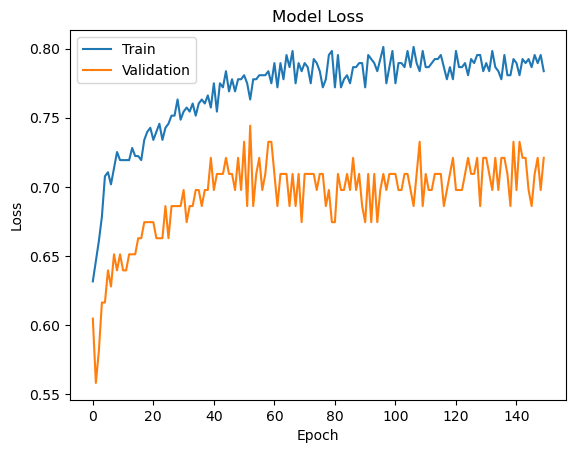

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Test the models performance on the test dataset

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test data
predictions = model.predict(features_test)

# Make all predictions with a confidence of 0.5 a 1 and below a 0
predictions = [1 if x >= 0.5 else 0 for x in predictions]

# Evaluate the predictions with sklearn.metrics
print(f"Accuracy: {accuracy_score(target_test, predictions)}")

4/4 [==============================] - 0s 5ms/step
Accuracy: 0.75


# Predict a new example patient

In [15]:
# predict a new example patient
print("categories: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age")
new_patient = [[1, 85, 66, 29, 0, 26.6, 0.351, 31]]
print(new_patient)

# MinMaxScaler transform
new_patient_scaled = scaler.transform(new_patient)

# Make a prediction with the model
prediction = model.predict(new_patient_scaled)

# Print the prediction in human readable format, either diabetes or no diabetes. make a cut at 0.5
if prediction[0] < 0.5:
    print("No diabetes")
else:
    print("Diabetes")

categories: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
[[1, 85, 66, 29, 0, 26.6, 0.351, 31]]
1/1 [==============================] - 0s 28ms/step
No diabetes


C:\Users\orhe\Anaconda3\envs\workshopEnvironment\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
